<a href="https://colab.research.google.com/github/sunny1628/Interview-Platform/blob/main/Car_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

In [ ]:
f = pd.read_csv('cars_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'cars_data.csv'

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       1000 non-null   int64  
 1   Price    989 non-null    float64
 2   Year     989 non-null    float64
 3   Mileage  990 non-null    float64
 4   City     1000 non-null   object 
 5   State    1000 non-null   object 
 6   Vin      1000 non-null   object 
 7   Make     1000 non-null   object 
 8   Model    1000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 70.4+ KB


In [ ]:
#checking null values before handling them
df.isnull().sum()

Id          0
Price      11
Year       11
Mileage    10
City        0
State       0
Vin         0
Make        0
Model       0
dtype: int64

<Axes: >

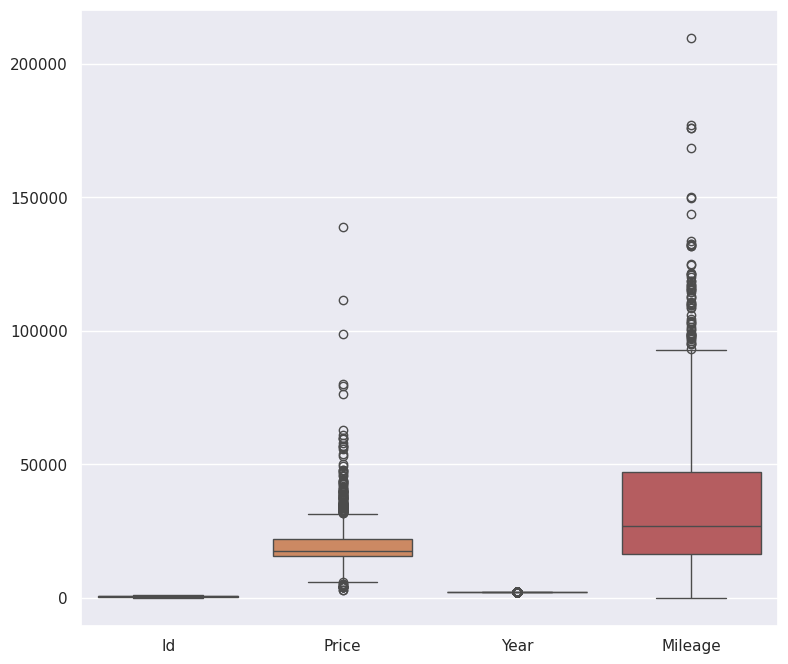

In [ ]:
# checking the outliers

plt.figure(figsize=(9, 8))
sns.boxplot(data = df)

In [ ]:
df['State'].mode()[0]

' FL'

In [ ]:
# handling null values

df['Price'] = df['Price'].fillna(df['Price'].median())
df['Year'] = df['Year'].fillna(df['Year'].median())
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())


In [ ]:
df.isnull().sum()

Id         0
Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

State
 FL    103
 TX    103
 CA     77
 IL     55
 GA     47
 OH     46
 NC     44
 AZ     39
 PA     39
 VA     36
 KY     34
 NJ     33
 NY     32
 MO     29
 IN     26
 CO     26
 MD     21
 MI     18
 TN     17
 AL     16
 MA     15
 WA     12
 OK     11
 KS     11
 MN     11
 LA     11
 SC     10
 NV      9
 OR      9
 WI      9
 AR      6
 CT      5
 NM      5
 RI      4
 Fl      4
 NE      4
 UT      4
 MS      3
 DE      3
 NH      3
 IA      2
 ME      2
 HI      2
 ID      1
 ND      1
 Va      1
 MT      1
Name: count, dtype: int64


<Axes: xlabel='State', ylabel='count'>

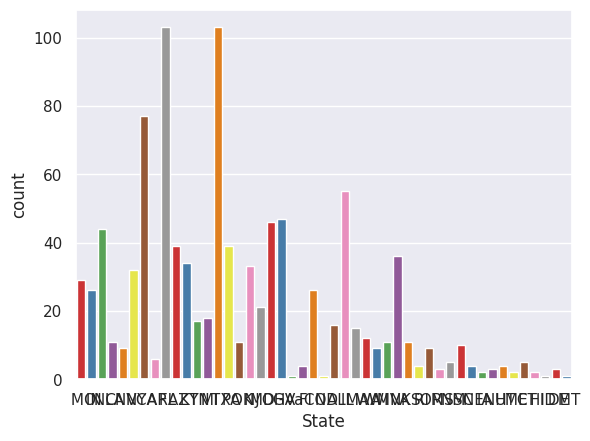

In [ ]:
print(df['State'].value_counts())
sns.countplot(x='State', data=df, palette='Set1')

Vin
KL4CJBSBXFB267643    1
WAUD2AFD1DN009887    1
WAURGAFDXDN004405    1
WA1LGAFE7FD001482    1
WA1AY74L39D003307    1
                    ..
KL4CJASB0GB711642    1
KL4CJESB7FB132797    1
KL4CJBSB1FB151604    1
KL4CJBSB0FB139704    1
1GNKRJKD9DJ243978    1
Name: count, Length: 1000, dtype: int64


<Axes: xlabel='Vin', ylabel='count'>

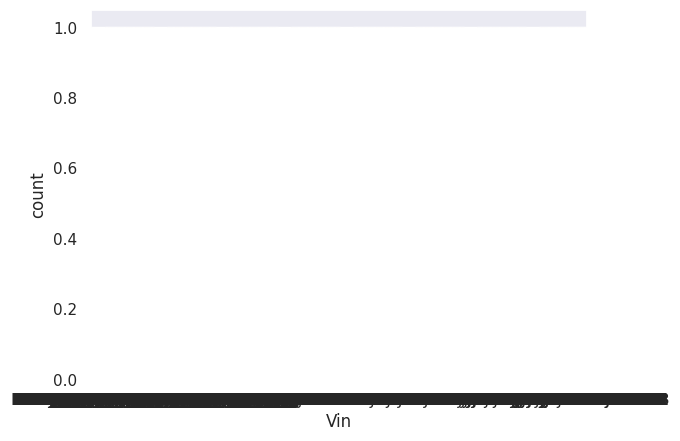

In [ ]:
print(df['Vin'].value_counts())
sns.countplot(x='Vin', data=df, palette='Set1')

Make
Buick        522
BMW          171
Chevrolet     95
Audi          94
Acura         84
Cadillac      29
Bentley        3
Alfa           1
Aston          1
Name: count, dtype: int64


<Axes: xlabel='Make', ylabel='count'>

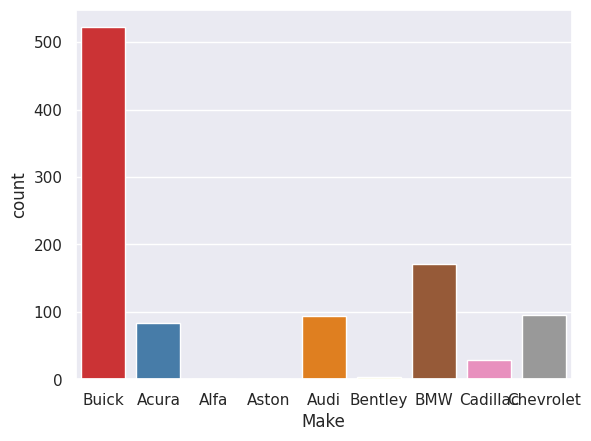

In [ ]:
print(df['Make'].value_counts())
sns.countplot(x='Make', data=df, palette='Set1')

Model
EncoreFWD            294
EncoreConvenience    128
3                     67
5                     33
EncoreAWD             32
                    ... 
X3sDrive28i            1
X1xDrive28i            1
X1xDrive35i            1
R82dr                  1
Traverse2LT            1
Name: count, Length: 158, dtype: int64


<Axes: xlabel='Model', ylabel='count'>

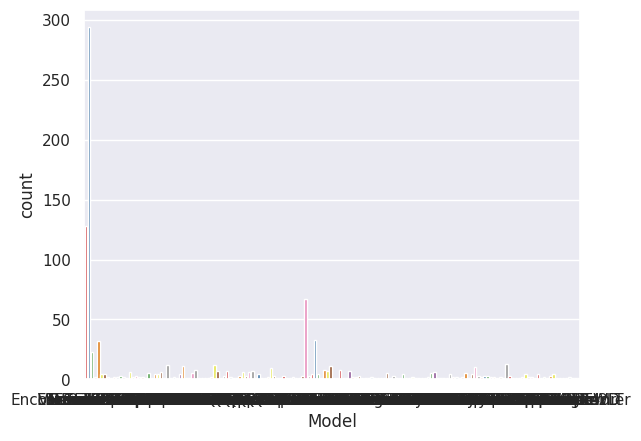

In [ ]:
print(df['Model'].value_counts())
sns.countplot(x='Model', data=df, palette='Set1')

<Axes: >

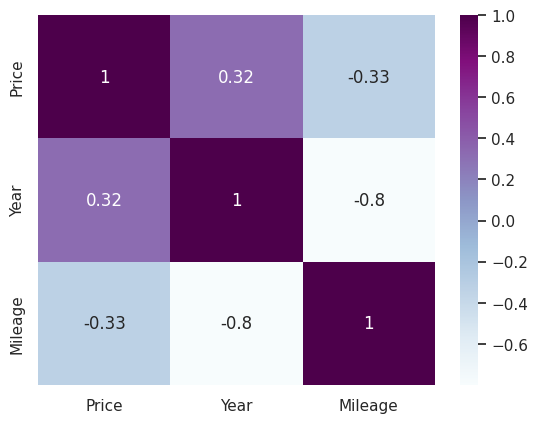

In [ ]:
## checking the correlation between the attributes of numerical data type

cols = ['Price', 'Year', 'Mileage']

corr = df[cols].corr()
sns.heatmap(corr, annot = True, cmap = 'BuPu')

<Axes: xlabel='PriceLog', ylabel='Density'>

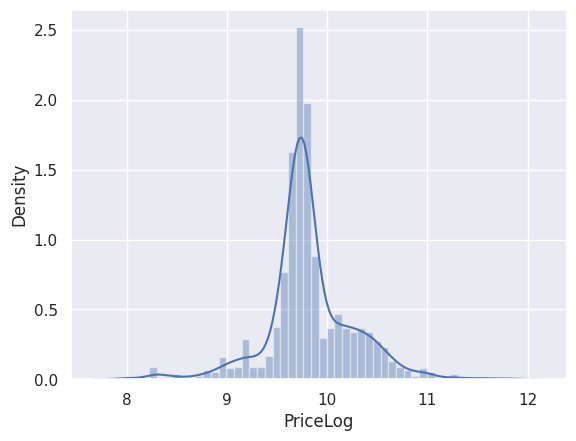

In [ ]:
df['PriceLog'] = np.log(df['Price']+1)
sns.distplot(df['PriceLog'])

<Axes: xlabel='YearLog', ylabel='Density'>

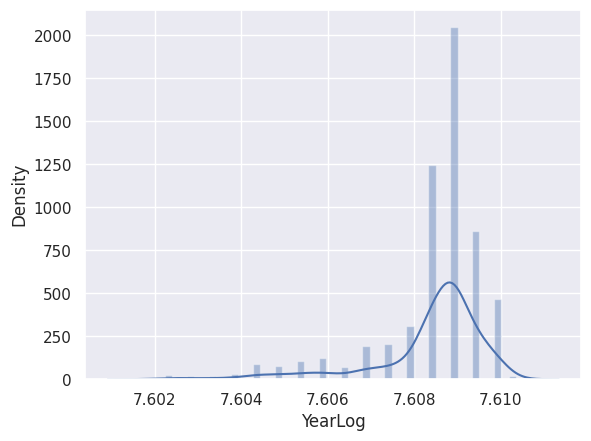

In [ ]:
df['YearLog'] = np.log(df['Year']+1)
sns.distplot(df['YearLog'])

<Axes: xlabel='MileageLog', ylabel='Density'>

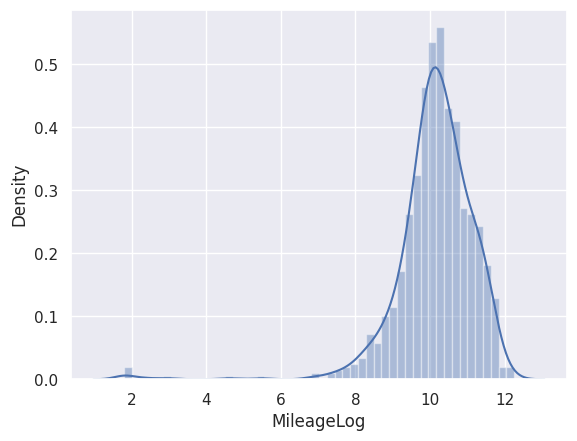

In [ ]:
df['MileageLog'] = np.log(df['Mileage']+1)
sns.distplot(df['MileageLog'])

In [ ]:
df.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model,PriceLog,YearLog,MileageLog
0,1,16472.0,2015.0,18681.0,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience,9.709478,7.608871,9.835316
1,2,15749.0,2015.0,27592.0,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD,9.664596,7.608871,10.225317
2,3,16998.0,2015.0,13650.0,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather,9.740910,7.608871,9.521568
3,4,17384.0,2015.0,25195.0,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD,9.763363,7.608871,10.134441
4,5,16784.0,2015.0,22800.0,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience,9.728241,7.608871,10.034560


In [ ]:
# drop the unnecessary columns

cols = ['Id', 'Price',  'Year', 'Mileage', 'Vin']

df = df.drop(columns = cols, axis =1)
df.head()

,City,State,Make,Model,PriceLog,YearLog,MileageLog
0,Jefferson City,MO,Buick,EncoreConvenience,9.709478,7.608871,9.835316
1,Highland,IN,Buick,EncoreFWD,9.664596,7.608871,10.225317
2,Boone,NC,Buick,EncoreLeather,9.740910,7.608871,9.521568
3,New Orleans,LA,Buick,EncoreFWD,9.763363,7.608871,10.134441
4,Las Vegas,NV,Buick,EncoreConvenience,9.728241,7.608871,10.034560


In [ ]:
# Defining independent (x) & dependent (y) variable
x = df.drop(columns = 'PriceLog', axis = 1)
y = df['PriceLog']

In [ ]:
print(x)

               City State       Make              Model   YearLog  MileageLog
0    Jefferson City    MO      Buick  EncoreConvenience  7.608871    9.835316
1          Highland    IN      Buick          EncoreFWD  7.608871   10.225317
2             Boone    NC      Buick      EncoreLeather  7.608871    9.521568
3       New Orleans    LA      Buick          EncoreFWD  7.608871   10.134441
4         Las Vegas    NV      Buick  EncoreConvenience  7.608871   10.034560
..              ...   ...        ...                ...       ...         ...
995        Columbus    OH  Chevrolet        Cavalier4dr  7.602401   11.610805
996          Pueblo    CO  Chevrolet           MalibuLS  7.609367    9.843419
997          Marion    IL  Chevrolet        TraverseFWD  7.606885   11.593629
998      Montebello    CA  Chevrolet      ImpalaPremier  7.609862    9.638545
999         Houston    TX  Chevrolet        Traverse2LT  7.607878   11.495057

[1000 rows x 6 columns]


In [ ]:
x.shape

(1000, 6)

In [ ]:
print(y)

0       9.709478
1       9.664596
2       9.740910
3       9.763363
4       9.728241
         ...    
995     7.993282
996     9.680094
997     9.287394
998    10.134639
999     9.433564
Name: PriceLog, Length: 1000, dtype: float64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


# Convert x to a Pandas DataFrame
x = pd.DataFrame(x)

# Print x
print(x)

# Print the shape of x
print(x.shape)

# Create a ColumnTransformer to apply one-hot encoding to categorical columns
categorical_columns = ['City', 'State', 'Make', 'Model']
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)], remainder='passthrough')

# Fit and transform x using the ColumnTransformer
x = ct.fit_transform(x)

               City State       Make              Model   YearLog  MileageLog
0    Jefferson City    MO      Buick  EncoreConvenience  7.608871    9.835316
1          Highland    IN      Buick          EncoreFWD  7.608871   10.225317
2             Boone    NC      Buick      EncoreLeather  7.608871    9.521568
3       New Orleans    LA      Buick          EncoreFWD  7.608871   10.134441
4         Las Vegas    NV      Buick  EncoreConvenience  7.608871   10.034560
..              ...   ...        ...                ...       ...         ...
995        Columbus    OH  Chevrolet        Cavalier4dr  7.602401   11.610805
996          Pueblo    CO  Chevrolet           MalibuLS  7.609367    9.843419
997          Marion    IL  Chevrolet        TraverseFWD  7.606885   11.593629
998      Montebello    CA  Chevrolet      ImpalaPremier  7.609862    9.638545
999         Houston    TX  Chevrolet        Traverse2LT  7.607878   11.495057

[1000 rows x 6 columns]
(1000, 6)


In [ ]:
print(x)

  (0, 230)	1.0
  (0, 573)	1.0
  (0, 603)	1.0
  (0, 652)	1.0
  (0, 764)	7.60887062919126
  (0, 765)	9.835315772432795
  (1, 212)	1.0
  (1, 564)	1.0
  (1, 603)	1.0
  (1, 654)	1.0
  (1, 764)	7.60887062919126
  (1, 765)	10.225317396349036
  (2, 45)	1.0
  (2, 576)	1.0
  (2, 603)	1.0
  (2, 655)	1.0
  (2, 764)	7.60887062919126
  (2, 765)	9.521568058002977
  (3, 335)	1.0
  (3, 567)	1.0
  (3, 603)	1.0
  (3, 654)	1.0
  (3, 764)	7.60887062919126
  (3, 765)	10.13444053074182
  (4, 256)	1.0
  :	:
  (995, 765)	11.610805068249771
  (996, 397)	1.0
  (996, 554)	1.0
  (996, 605)	1.0
  (996, 686)	1.0
  (996, 764)	7.6093665379542115
  (996, 765)	9.84341902607001
  (997, 287)	1.0
  (997, 563)	1.0
  (997, 605)	1.0
  (997, 734)	1.0
  (997, 764)	7.60688453121963
  (997, 765)	11.59362949238519
  (998, 318)	1.0
  (998, 553)	1.0
  (998, 605)	1.0
  (998, 670)	1.0
  (998, 764)	7.609862200913554
  (998, 765)	9.638544967053836
  (999, 219)	1.0
  (999, 591)	1.0
  (999, 605)	1.0
  (999, 733)	1.0
  (999, 764)	7.6078780

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1000 non-null   object 
 1   State       1000 non-null   object 
 2   Make        1000 non-null   object 
 3   Model       1000 non-null   object 
 4   PriceLog    1000 non-null   float64
 5   YearLog     1000 non-null   float64
 6   MileageLog  1000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1000 non-null   object 
 1   State       1000 non-null   object 
 2   Make        1000 non-null   object 
 3   Model       1000 non-null   object 
 4   PriceLog    1000 non-null   float64
 5   YearLog     1000 non-null   float64
 6   MileageLog  1000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 54.8+ KB


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)


0.052444882448011744


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
regressor = RandomForestRegressor()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

0.045145185340162326


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
regressor = KNeighborsRegressor()

regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

0.07627853788194164
